In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [3]:
data = pd.read_csv(r"C:\Users\nmadh\OneDrive\Desktop\Project\hotel_bookings.csv")

In [4]:
data.shape

(119390, 32)

In [34]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [35]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [36]:
data.drop(['agent','company'] ,axis=1 ,inplace = True)

In [37]:
data.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [41]:
data['country'] = data['country'].fillna('PRT')
data['children'] = data['children'].fillna(0)

In [42]:
data = data[~( (data['children']==0 ) & (data['babies']==0) & (data['adults']==0) )]
data.shape

(119210, 30)

In [44]:
def weekend(row):
    i = 'stays_in_weekend_nights'
    j = 'stays_in_week_nights'
    
    if row[i] == 0 and row[j] > 0:
        return 'guest_stayed_in_weekdays'
    elif row[j] == 0 and row[i] > 0:
        return 'guest_stayed_in_weekends'
    elif row[i] > 0 and row[j] > 0:
        return 'guest_stayed_both_weekends_and_weekdays'
    else:
        return 'undefined'

In [45]:
data['guest_stayed']=data.apply(weekend,axis=1)
data['guest_stayed'].value_counts()

guest_stayed_both_weekends_and_weekdays    60388
guest_stayed_in_weekdays                   51250
guest_stayed_in_weekends                    6927
undefined                                    645
Name: guest_stayed, dtype: int64

In [46]:
data = data[~(data['guest_stayed'] == 'undefined')]
data.shape

(118565, 31)

In [48]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'guest_stayed'],
      dtype='object')

In [50]:
country_analysis = (data['country'].value_counts()/len(data) ).reset_index()
country_analysis.columns = ['country','percentage_of_people']
country_analysis

,country,percentage_of_people
0,PRT,0.408350
1,GBR,0.102012
2,FRA,0.087623
3,ESP,0.072062
4,DEU,0.061443
...,...,...
172,DJI,0.000008
173,HND,0.000008
174,BWA,0.000008
175,VGB,0.000008


In [51]:
data['is_canceled'].value_counts()

0    74389
1    44176
Name: is_canceled, dtype: int64

In [52]:
data['hotel'].value_counts()

City Hotel      78899
Resort Hotel    39666
Name: hotel, dtype: int64

In [53]:
x = len(data['hotel']=='Resort Hotel')
resort_data = (data[data['hotel'] =='Resort Hotel']['arrival_date_month'].value_counts()/x).reset_index()
resort_data.columns=['month','guest on Resort Hotel']

y = len(data['hotel'] == 'City Hotel')
city_data = (data[data['hotel']=='City Hotel']['arrival_date_month'].value_counts()/y).reset_index()
city_data.columns=['month','guest on City Hotel']

month_vs_guest = resort_data.merge(city_data,on='month')

In [54]:
import sort_dataframeby_monthorweek as sdm
month_vs_guest = sdm.Sort_Dataframeby_Month(month_vs_guest,'month')
month_vs_guest.set_index('month',inplace=True)
month_vs_guest

,guest on Resort Hotel,guest on City Hotel
month,,
January,0.018209,0.031308
February,0.025986,0.041471
March,0.027875,0.054072
April,0.030253,0.062902
May,0.029688,0.069025
June,0.025446,0.066411
July,0.038224,0.067929
August,0.040990,0.075503
September,0.026146,0.062219


Text(0, 0.5, 'Percentage of guest')

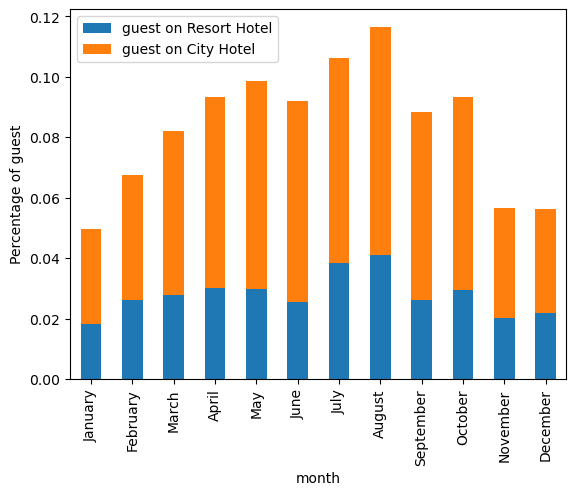

In [55]:
month_vs_guest.plot(kind ='bar',stacked =True)
plt.ylabel("Percentage of guest")

In [56]:
pd.crosstab(index = data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,0,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data['total_family_members'] = data['children'] + data['babies'] + data['adults']
data['total_nights_spend'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [58]:
data1 = data.groupby(['arrival_date_month','guest_stayed']).size().unstack().reset_index()
data1 = sdm.Sort_Dataframeby_Month(data1,'arrival_date_month')
data1.set_index('arrival_date_month',inplace=True)
data1

,guest_stayed_both_weekends_and_weekdays,guest_stayed_in_weekdays,guest_stayed_in_weekends
arrival_date_month,,,
January,2339,3075,457
February,3669,3796,533
March,4705,4512,499
April,6024,4420,601
May,5719,5197,788
June,5395,4942,554
July,7437,4528,621
August,7945,5221,646
September,5294,4531,652


<Axes: xlabel='arrival_date_month'>

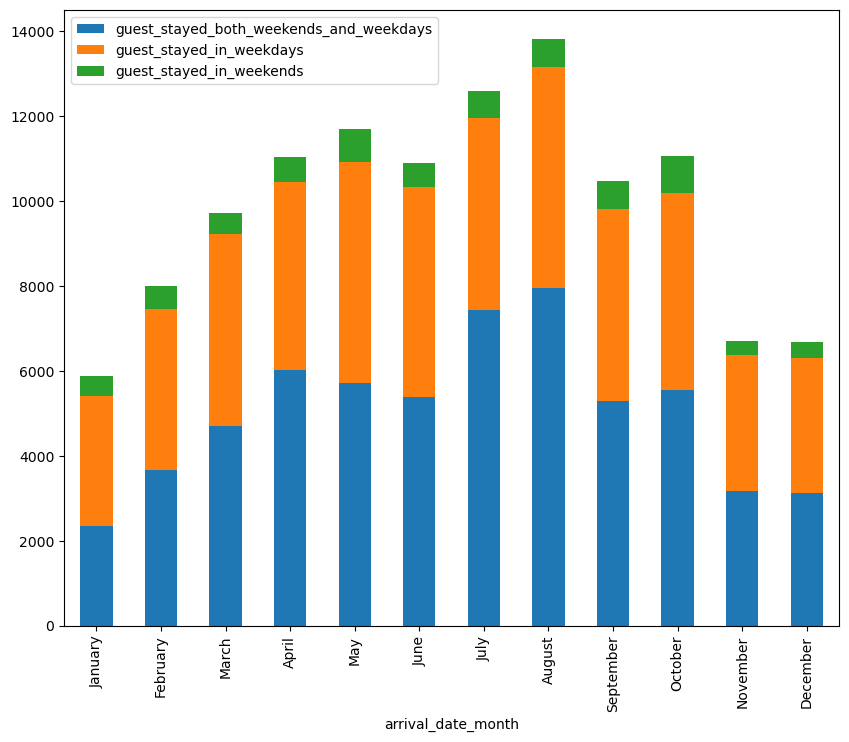

In [59]:
data1.plot(kind='bar',stacked=True,figsize=(10,8))

In [60]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [61]:
def deposit(row):
    if row['deposit_type'] == 'No Deposit' or row['deposit_type'] == 'Refundable':
        return 0
    else:
        return 1

In [62]:
data['deposit']=data.apply(deposit,axis=1)

In [63]:
data.drop(columns=['children', 'babies', 'adults', 'deposit_type'], axis=1 ,inplace=True)

<Axes: >

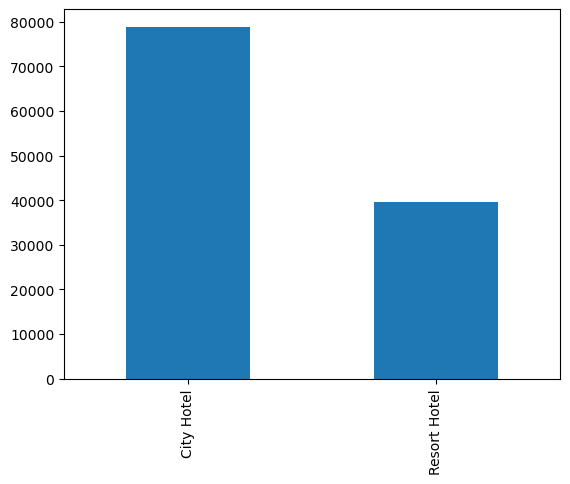

In [64]:
data['hotel'].value_counts().plot(kind='bar')

In [65]:
data2 = (data.groupby(['hotel','is_canceled']).size()).unstack()
data2

is_canceled,0,1
hotel,,
City Hotel,45833,33066
Resort Hotel,28556,11110


In [66]:
def convert_to_percent(row):
        total = row.sum()
        return row/total  

In [67]:
data2 = data2.apply(convert_to_percent,axis=1)
data2

is_canceled,0,1
hotel,,
City Hotel,0.580907,0.419093
Resort Hotel,0.719911,0.280089


<Axes: xlabel='hotel'>

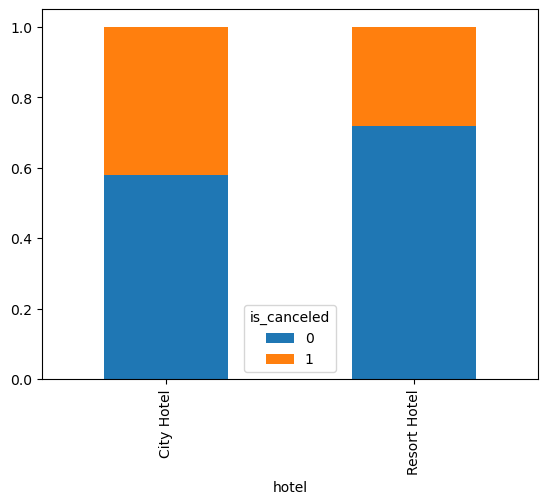

In [68]:
data2.plot(kind='bar',stacked=True)

<Axes: xlabel='customer_type'>

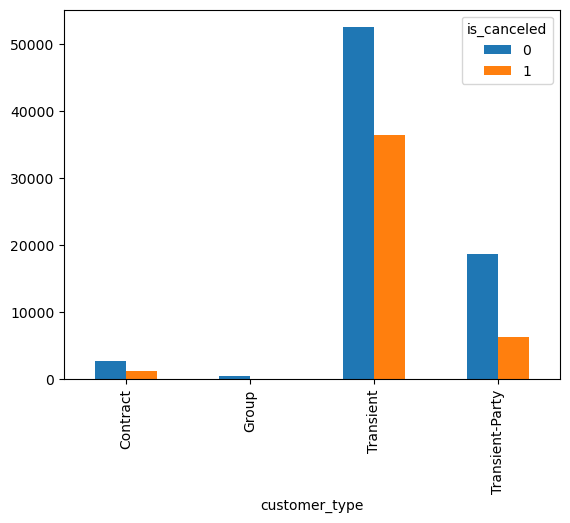

In [69]:
data.groupby(['customer_type','is_canceled']).size().unstack().plot(kind='bar')

<Axes: xlabel='total_of_special_requests'>

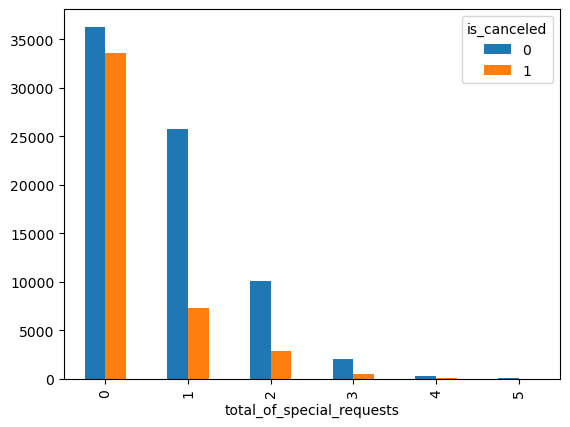

In [70]:
data.groupby(['total_of_special_requests','is_canceled']).size().unstack().plot(kind='bar')

<Axes: xlabel='required_car_parking_spaces'>

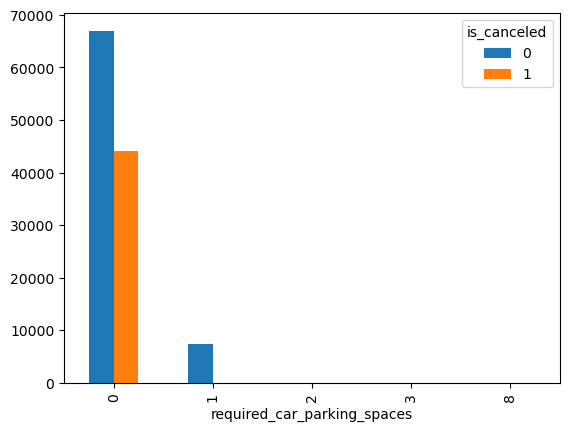

In [71]:
data.groupby(['required_car_parking_spaces','is_canceled']).size().unstack().plot(kind='bar')

In [73]:
data3 = data.groupby(['arrival_date_month','is_canceled']).size().unstack().reset_index()
data3 = sdm.Sort_Dataframeby_Month(data3,'arrival_date_month')
data3[data3.columns[1:]] = data3[data3.columns[1:]].apply(convert_to_percent, axis=1)
data3.set_index('arrival_date_month',inplace=True)
data3

,0,1
arrival_date_month,,
January,0.692897,0.307103
February,0.664166,0.335834
March,0.676204,0.323796
April,0.591218,0.408782
May,0.600564,0.399436
June,0.583877,0.416123
July,0.623709,0.376291
August,0.620837,0.379163
September,0.607330,0.392670


<Axes: xlabel='arrival_date_month'>

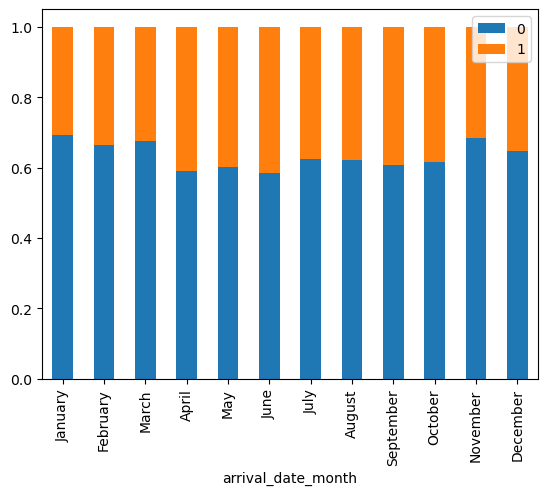

In [74]:
data3.plot(kind='bar',stacked = 'True')

In [75]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'guest_stayed', 'total_family_members',
       'total_nights_spend', 'deposit'],
      dtype='object')

In [76]:
data['is_repeated_guest'].value_counts()

0    115066
1      3499
Name: is_repeated_guest, dtype: int64

<Axes: xlabel='is_repeated_guest'>

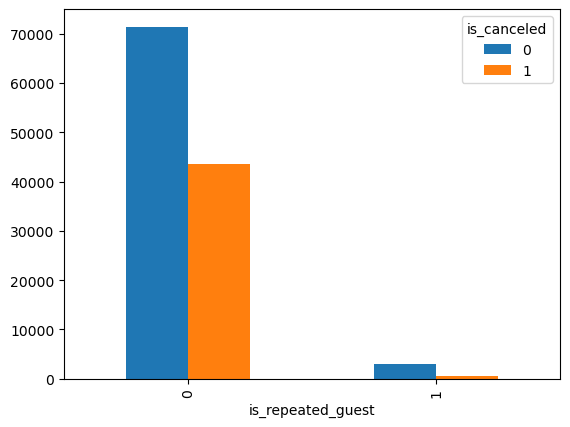

In [83]:
data.groupby(['is_repeated_guest','is_canceled']).size().unstack().plot(kind='bar')

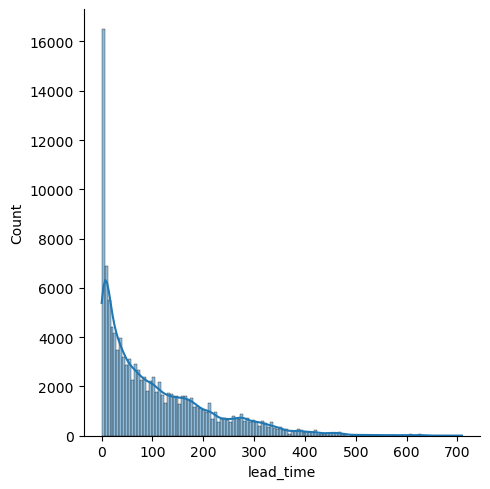

In [79]:
sns.displot(data['lead_time'],kde=True)

In [80]:
data['lead_time'] = np.log1p(data['lead_time'])

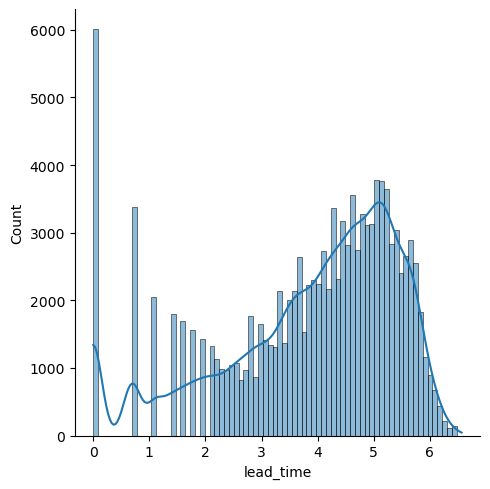

In [81]:
sns.displot(data['lead_time'],kde=True)

In [82]:
cat_features = [col for col in data.columns if data[col].dtypes== 'object']
num_features = [col for col in data.columns if data[col].dtypes!= 'object']
cat_data = data[cat_features]
num_data = data[num_features]
cat_data['is_canceled'] = data['is_canceled']
cat_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,guest_stayed,is_canceled
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015,guest_stayed_in_weekdays,0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015,guest_stayed_in_weekdays,0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,guest_stayed_in_weekdays,0
5,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,guest_stayed_in_weekdays,0
6,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/3/2015,guest_stayed_in_weekdays,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,Transient,Check-Out,9/6/2017,guest_stayed_both_weekends_and_weekdays,0
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,Transient,Check-Out,9/7/2017,guest_stayed_both_weekends_and_weekdays,0
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,Transient,Check-Out,9/7/2017,guest_stayed_both_weekends_and_weekdays,0
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,9/7/2017,guest_stayed_both_weekends_and_weekdays,0


In [84]:
column = cat_data.columns
column = column[0:-1] 
column

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'guest_stayed'],
      dtype='object')

In [86]:
feature_list=[]
for col in column:
    cat_dict = cat_data.groupby([col])['is_canceled'].mean().to_dict()
    feature_list.append(cat_dict)
    cat_data[col]=cat_data[col].map(cat_dict)
feature_list    

[{0.28008874098724346: 0.28008874098724346,
  0.4190927641668462: 0.4190927641668462},
 {0.30710270822687785: 0.30710270822687785,
  0.31585220500595945: 0.31585220500595945,
  0.3237958007410457: 0.3237958007410457,
  0.3358339584896224: 0.3358339584896224,
  0.3538645537449544: 0.3538645537449544,
  0.37629111711425395: 0.37629111711425395,
  0.3791630466261222: 0.3791630466261222,
  0.3836767895878525: 0.3836767895878525,
  0.39266965734465975: 0.39266965734465975,
  0.3994360902255639: 0.3994360902255639,
  0.40878225441376187: 0.40878225441376187,
  0.41612340464603803: 0.41612340464603803},
 {0.24655172413793103: 0.24655172413793103,
  0.3464265850945495: 0.3464265850945495,
  0.3754165476530515: 0.3754165476530515,
  0.37598805071902835: 0.37598805071902835,
  0.5997490589711418: 0.5997490589711418},
 {0.0: 0.0,
  0.0297029702970297: 0.0297029702970297,
  0.05263157894736842: 0.05263157894736842,
  0.07142857142857142: 0.07142857142857142,
  0.08108108108108109: 0.08108108108108

In [87]:
cat_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,guest_stayed,is_canceled
2,0.280089,0.376291,0.375988,0.202646,0.155033,0.176458,0.393534,0.189787,0.410109,0.0,0.985075,0.379746,0
3,0.280089,0.376291,0.375988,0.202646,0.189065,0.222053,0.393534,0.446245,0.410109,0.0,0.985075,0.379746,0
4,0.280089,0.376291,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.0,0.522876,0.379746,0
5,0.280089,0.376291,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.0,0.522876,0.379746,0
6,0.280089,0.376291,0.375988,0.569047,0.155033,0.176458,0.332611,0.189787,0.410109,0.0,0.522876,0.379746,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.419093,0.379163,0.375988,0.202310,0.345170,0.412216,0.393534,0.446245,0.410109,0.0,0.000000,0.378171,0
119386,0.419093,0.379163,0.375988,0.185966,0.369203,0.412216,0.294199,0.252609,0.410109,0.0,0.000000,0.378171,0
119387,0.419093,0.379163,0.375988,0.167193,0.369203,0.412216,0.319334,0.252252,0.410109,0.0,0.000000,0.378171,0
119388,0.419093,0.379163,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.0,0.000000,0.378171,0


In [88]:
merged_num_data = cat_data.merge(num_data,left_index=True,right_index=True)
merged_num_data.drop('is_canceled_y',axis=1,inplace=True)
merged_num_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,total_nights_spend,deposit
2,0.280089,0.376291,0.375988,0.202646,0.155033,0.176458,0.393534,0.189787,0.410109,0.0,...,0,0,0,0,75.00,0,0,1.0,1,0
3,0.280089,0.376291,0.375988,0.202646,0.189065,0.222053,0.393534,0.446245,0.410109,0.0,...,0,0,0,0,75.00,0,0,1.0,1,0
4,0.280089,0.376291,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.0,...,0,0,0,0,98.00,0,1,2.0,2,0
5,0.280089,0.376291,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.0,...,0,0,0,0,98.00,0,1,2.0,2,0
6,0.280089,0.376291,0.375988,0.569047,0.155033,0.176458,0.332611,0.189787,0.410109,0.0,...,0,0,0,0,107.00,0,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.419093,0.379163,0.375988,0.202310,0.345170,0.412216,0.393534,0.446245,0.410109,0.0,...,0,0,0,0,96.14,0,0,2.0,7,0
119386,0.419093,0.379163,0.375988,0.185966,0.369203,0.412216,0.294199,0.252609,0.410109,0.0,...,0,0,0,0,225.43,0,2,3.0,7,0
119387,0.419093,0.379163,0.375988,0.167193,0.369203,0.412216,0.319334,0.252252,0.410109,0.0,...,0,0,0,0,157.71,0,4,2.0,7,0
119388,0.419093,0.379163,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.0,...,0,0,0,0,104.40,0,0,2.0,7,0


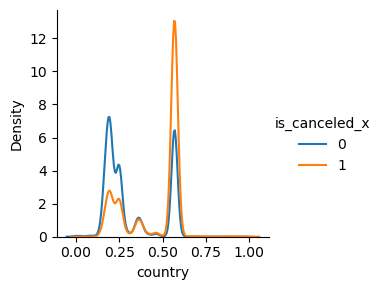

In [89]:
sns.FacetGrid(merged_num_data,hue='is_canceled_x').map(sns.kdeplot,'country').add_legend()

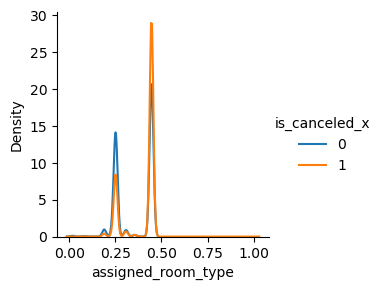

In [90]:
sns.FacetGrid(merged_num_data,hue='is_canceled_x').map(sns.kdeplot,'assigned_room_type').add_legend()

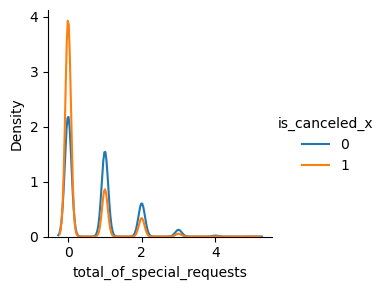

In [91]:
sns.FacetGrid(merged_num_data,hue='is_canceled_x').map(sns.kdeplot,'total_of_special_requests').add_legend()

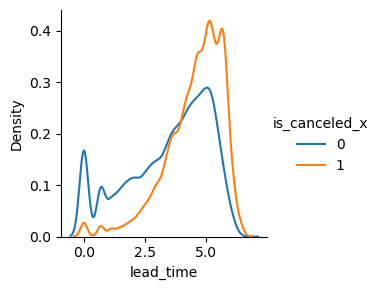

In [92]:
sns.FacetGrid(merged_num_data,hue='is_canceled_x').map(sns.kdeplot,'lead_time').add_legend()

In [93]:
merged_num_data.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'guest_stayed', 'is_canceled_x', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_family_members', 'total_nights_spend', 'deposit'],
      dtype='object')

In [94]:
corelation = merged_num_data.corr()
corelation

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,total_nights_spend,deposit
hotel,1.000000,0.050811,0.061260,-0.038878,0.102585,0.182601,0.197679,0.279170,-0.008430,0.135652,...,-0.012618,-0.004306,-0.076519,0.072588,0.093987,-0.220157,-0.043958,-0.039327,-0.255923,0.172026
arrival_date_month,0.050811,1.000000,-0.010407,-0.050707,0.047980,0.076801,-0.038455,0.014597,-0.029669,0.069263,...,0.008423,-0.022059,-0.010755,0.029862,0.280097,-0.022062,0.003096,0.077717,0.043235,0.057200
meal,0.061260,-0.010407,1.000000,0.023688,-0.025611,-0.026447,0.009052,0.013289,0.105532,0.050449,...,0.103633,0.011293,-0.027169,-0.031503,-0.035661,0.003651,0.006247,-0.003722,-0.056529,0.048189
country,-0.038878,-0.050707,0.023688,1.000000,0.081596,-0.129204,0.154297,0.133790,-0.030915,0.362444,...,0.094190,0.092352,-0.062569,0.068068,-0.125627,0.008491,-0.201935,-0.117199,-0.155994,0.399581
market_segment,0.102585,0.047980,-0.025611,0.081596,1.000000,0.540711,0.183166,0.210792,-0.265132,0.266469,...,0.074614,-0.117887,-0.058605,0.096275,-0.119719,-0.146350,-0.156997,-0.024532,-0.007700,0.397252
distribution_channel,0.182601,0.076801,-0.026447,-0.129204,0.540711,1.000000,0.070603,0.120444,-0.023202,0.176645,...,-0.004085,-0.143103,-0.117693,0.047891,0.040577,-0.147118,0.073572,0.086904,0.082434,0.114815
reserved_room_type,0.197679,-0.038455,0.009052,0.154297,0.183166,0.070603,1.000000,0.732377,-0.143572,0.073243,...,0.049386,0.022446,-0.040149,0.068463,-0.304103,-0.092860,-0.161313,-0.244446,-0.189645,0.202411
assigned_room_type,0.279170,0.014597,0.013289,0.133790,0.210792,0.120444,0.732377,1.000000,-0.084441,0.199336,...,0.063453,-0.003617,-0.096784,0.067082,-0.202718,-0.133608,-0.136899,-0.232388,-0.114652,0.264409
customer_type,-0.008430,-0.029669,0.105532,-0.030915,-0.265132,-0.023202,-0.143572,-0.084441,1.000000,0.137807,...,-0.021344,0.024707,-0.094525,-0.101909,0.179905,0.062154,0.138087,0.124792,0.039359,0.122501
reservation_status,0.135652,0.069263,0.050449,0.362444,0.266469,0.176645,0.073243,0.199336,0.137807,1.000000,...,0.109974,-0.057541,-0.145198,0.053941,0.039368,-0.196804,-0.236165,0.044237,0.013554,0.481103


In [95]:
corelation['is_canceled_x'].sort_values(ascending=True)

total_of_special_requests        -0.236165
required_car_parking_spaces      -0.196804
booking_changes                  -0.145198
is_repeated_guest                -0.077791
previous_bookings_not_canceled   -0.057541
arrival_date_day_of_month        -0.006108
stays_in_weekend_nights          -0.004859
arrival_date_week_number          0.009019
total_nights_spend                0.013554
arrival_date_year                 0.015438
stays_in_week_nights              0.020703
adr                               0.039368
total_family_members              0.044237
meal                              0.050449
guest_stayed                      0.052378
days_in_waiting_list              0.053941
arrival_date_month                0.069263
reserved_room_type                0.073243
previous_cancellations            0.109974
hotel                             0.135652
customer_type                     0.137807
distribution_channel              0.176645
assigned_room_type                0.199336
market_segm

In [96]:
merged_num_data.drop(['reservation_status','total_nights_spend','arrival_date_week_number','arrival_date_year','stays_in_weekend_nights','arrival_date_day_of_month'],axis=1,inplace=True)
merged_num_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status_date,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,deposit
2,0.280089,0.376291,0.375988,0.202646,0.155033,0.176458,0.393534,0.189787,0.410109,0.985075,...,0,0,0,0,0,75.00,0,0,1.0,0
3,0.280089,0.376291,0.375988,0.202646,0.189065,0.222053,0.393534,0.446245,0.410109,0.985075,...,0,0,0,0,0,75.00,0,0,1.0,0
4,0.280089,0.376291,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.522876,...,0,0,0,0,0,98.00,0,1,2.0,0
5,0.280089,0.376291,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.522876,...,0,0,0,0,0,98.00,0,1,2.0,0
6,0.280089,0.376291,0.375988,0.569047,0.155033,0.176458,0.332611,0.189787,0.410109,0.522876,...,0,0,0,0,0,107.00,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.419093,0.379163,0.375988,0.202310,0.345170,0.412216,0.393534,0.446245,0.410109,0.000000,...,0,0,0,0,0,96.14,0,0,2.0,0
119386,0.419093,0.379163,0.375988,0.185966,0.369203,0.412216,0.294199,0.252609,0.410109,0.000000,...,0,0,0,0,0,225.43,0,2,3.0,0
119387,0.419093,0.379163,0.375988,0.167193,0.369203,0.412216,0.319334,0.252252,0.410109,0.000000,...,0,0,0,0,0,157.71,0,4,2.0,0
119388,0.419093,0.379163,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.000000,...,0,0,0,0,0,104.40,0,0,2.0,0


In [98]:
merged_num_data.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status_date', 'guest_stayed',
       'is_canceled_x', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_family_members', 'deposit'],
      dtype='object')

In [99]:
X = merged_num_data.drop(['is_canceled_x'],axis=1)
X

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status_date,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,deposit
2,0.280089,0.376291,0.375988,0.202646,0.155033,0.176458,0.393534,0.189787,0.410109,0.985075,...,0,0,0,0,0,75.00,0,0,1.0,0
3,0.280089,0.376291,0.375988,0.202646,0.189065,0.222053,0.393534,0.446245,0.410109,0.985075,...,0,0,0,0,0,75.00,0,0,1.0,0
4,0.280089,0.376291,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.522876,...,0,0,0,0,0,98.00,0,1,2.0,0
5,0.280089,0.376291,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.522876,...,0,0,0,0,0,98.00,0,1,2.0,0
6,0.280089,0.376291,0.375988,0.569047,0.155033,0.176458,0.332611,0.189787,0.410109,0.522876,...,0,0,0,0,0,107.00,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.419093,0.379163,0.375988,0.202310,0.345170,0.412216,0.393534,0.446245,0.410109,0.000000,...,0,0,0,0,0,96.14,0,0,2.0,0
119386,0.419093,0.379163,0.375988,0.185966,0.369203,0.412216,0.294199,0.252609,0.410109,0.000000,...,0,0,0,0,0,225.43,0,2,3.0,0
119387,0.419093,0.379163,0.375988,0.167193,0.369203,0.412216,0.319334,0.252252,0.410109,0.000000,...,0,0,0,0,0,157.71,0,4,2.0,0
119388,0.419093,0.379163,0.375988,0.202646,0.369203,0.412216,0.393534,0.446245,0.410109,0.000000,...,0,0,0,0,0,104.40,0,0,2.0,0


In [100]:
Y = merged_num_data['is_canceled_x']
Y

2         0
3         0
4         0
5         0
6         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled_x, Length: 118565, dtype: int64

In [1157]:
# feature selection

In [101]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [102]:
estimator = Lasso(alpha = 0.005)

In [103]:
sfm = SelectFromModel(estimator)
sfm.fit(X,Y)
selected_features = X.columns[sfm.get_support()]
selected_features

Index(['country', 'reservation_status_date', 'lead_time',
       'stays_in_week_nights', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_family_members', 'deposit'],
      dtype='object')

In [104]:
X=X[selected_features]
X

,country,reservation_status_date,lead_time,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,deposit
2,0.202646,0.985075,2.079442,1,0,0,0,0,75.00,0,0,1.0,0
3,0.202646,0.985075,2.639057,1,0,0,0,0,75.00,0,0,1.0,0
4,0.202646,0.522876,2.708050,2,0,0,0,0,98.00,0,1,2.0,0
5,0.202646,0.522876,2.708050,2,0,0,0,0,98.00,0,1,2.0,0
6,0.569047,0.522876,0.000000,2,0,0,0,0,107.00,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.202310,0.000000,3.178054,5,0,0,0,0,96.14,0,0,2.0,0
119386,0.185966,0.000000,4.634729,5,0,0,0,0,225.43,0,2,3.0,0
119387,0.167193,0.000000,3.555348,5,0,0,0,0,157.71,0,4,2.0,0
119388,0.202646,0.000000,4.700480,5,0,0,0,0,104.40,0,0,2.0,0


In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [106]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,Y_test)
cm

array([[17186,  4078],
       [ 1283,  7095]], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.8191417583159031

In [1057]:
#cross- validate

In [109]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [110]:
ac=[]
bnb = BernoulliNB()

bnb.fit(X_train,Y_train)
y_pred2 = bnb.predict(X_test)
ac.append(accuracy_score(Y_test,y_pred2))
accuracy_score(Y_test,y_pred2)

0.760407529856285

In [111]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,Y_train)
y_pred3 = dtc.predict(X_test)
ac.append(accuracy_score(Y_test,y_pred3))
accuracy_score(Y_test,y_pred3)

0.839417043384387

In [112]:
from sklearn.model_selection import KFold
rfc = RandomForestClassifier()

kf = KFold(n_splits =5,shuffle =True)

rfc.fit(X_train,Y_train)
y_pred4 = rfc.predict(X_test)
ac.append(accuracy_score(Y_test,y_pred4))
accuracy_score(Y_test,y_pred4)

0.8819580325214224

In [113]:
knn = KNeighborsClassifier()

knn.fit(X_train,Y_train)
y_pred5 = knn.predict(X_test)
ac.append(accuracy_score(Y_test,y_pred5))
accuracy_score(Y_test,y_pred5)

0.8065919978409014

In [1065]:
ac

[0.760407529856285, 0.8404291208420485, 0.8819242966061669, 0.8065919978409014]

In [1066]:
import statistics
statistics.mean(ac)

0.8223382362863505

In [1067]:
selected_features

Index(['country', 'reservation_status_date', 'lead_time',
       'stays_in_week_nights', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_family_members', 'deposit'],
      dtype='object')

In [1068]:
column

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'guest_stayed'],
      dtype='object')

In [1069]:
user_input=[]

In [1070]:
country = input("Enter your country code:")

Enter your country code:PRT


In [1071]:
lead_time = int(input("Enter the lead time:"))

Enter the lead time:320


In [1072]:
 stay_in_week_night = int(input("No of week nights you wish to stay:"))

No of week nights you wish to stay:3


In [1073]:
previous_cancelations = int(input("No of previous cancelations(if null write 0 else the number of times your booking got canceled):"))

No of previous cancelations(if null write 0 else the number of times your booking got canceled):3


In [1074]:
previous_bookings_not_canceled = int(input("No of times your booking succeded:"))

No of times your booking succeded:3


In [1075]:
booking_changes = int(input("No. of booking changes made in past:"))

No. of booking changes made in past:3


In [1076]:
days_in_waiting_list = int(input("No. of days in waiting list:"))

No. of days in waiting list:3


In [1077]:
adr = int(input("Average daily rate:"))

Average daily rate:123


In [1078]:
required_car_parking_spaces = int(input("Required car parking spaces:"))

Required car parking spaces:23


In [85]:
total_of_special_requests = int(input("Total no. of special requests:"))

Total no. of special requests:0


In [86]:
total_family_members = int(input("Total no. of family members:"))

Total no. of family members:2


In [87]:
deposit = int(input("Enter your deposit type: if(no deposit or refundable enter 0 else enter 1):"))

Enter your deposit type: if(no deposit or refundable enter 0 else enter 1):0


In [88]:
user_input.append(feature_list[3][country])
user_input.append(lead_time)
user_input.append(stay_in_week_night)
user_input.append(previous_cancelations)
user_input.append(previous_bookings_not_canceled)
user_input.append(booking_changes)
user_input.append(days_in_waiting_list)
user_input.append(adr)
user_input.append(required_car_parking_spaces)
user_input.append(total_of_special_requests)
user_input.append(total_family_members)
user_input.append(deposit)

In [90]:
df = pd.DataFrame([user_input],columns = selected_features)

In [91]:
df

,country,lead_time,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,deposit
0,0.254322,16,3,0,0,0,0,123,0,0,2,0


In [92]:
output = rfc.predict(df)

In [93]:
if output == 1:
    print('Your booking is more likely to be cancelled')
if output == 0:
    print('Your booking is more likely to be confirmed')

Your booking is more likely to be cancelled
